# 7.3

In [1]:
# 导入凸优化库
import cvxpy as cp
# 输入要优化的目标，这里是 min 1/2||w||^2
objective = cp.Minimize(0.5*cp.norm(w)**2) 
# 输入约束条件，这里使 y*(wx+b) >= 1
constraints = [cp.multiply(y, x*w + b) >= 1 ]
#构造凸优化问题
prob = cp.Problem(objective, constraints)
#解出结果
prob.solve()

ModuleNotFoundError: No module named 'cvxpy'

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_1689/1081115998.py:41: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=1, c=color, edgecolors='k', marker = m, zorder=9)


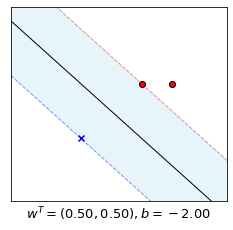

In [3]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

# 三个点的数据集
X = np.array([[3, 3],[4, 3],[1, 1],])
y = np.array([1,1,-1,])


# 凸优化
n = X.shape[1]	# 样本的特征个数
w = cp.Variable((n,1)) 	# 有多少个特征，就对应几维的 w
b = cp.Variable() 		# 一维向量
objective = cp.Minimize(0.5*cp.norm(w)**2) # 优化的目标，即 min 1/2||w||^2
constraints = [cp.multiply(y.reshape(-1,1), X@w + b) >= 1 ] #约束条件，即 y*(wx+b) >= 1，X 是矩阵所以用 @
prob = cp.Problem(objective, constraints) # 构造凸优化问题
prob.solve() # 解出结果

# 根据优化求出的 w 和 b 构造决策边界
def h(xx):
	return - w.value[0]/w.value[1] * xx  - b.value / w.value[1]

# 设置字体大小
plt.rcParams.update({'font.size': 13})
# 找出数据的边界
x1_min, x1_max = -1, 5.5
x2_min, x2_max = -1, 5.5
# 设置画布和坐标系
fig, ax = plt.subplots(figsize = (6, 3), nrows=1, ncols=1)
fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.1)
ax.set_xticks(()),ax.set_yticks(())
ax.set_xlim(x1_min-0.3, x1_max+0.3),ax.set_ylim(x2_min-0.3, x2_max+0.3)
ax.set_xlabel(r'$w^T=({:.2f},{:.2f}), b={:.2f}$'.format(w.value[0][0], w.value[1][0], b.value))

# 根据类别不同，绘制不同形状的点
markers = ('x', 'o')
colors = ('blue', 'red')
for cl, m, color in zip(np.unique(y), markers, colors):
	ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=1, c=color, edgecolors='k', marker = m, zorder=9)

# 绘制决策边界的宽度
xx1 = np.arange(x1_min-1, x1_max+1, 0.1)
ax.plot(xx1, h(xx1)+1/w.value[1], 'r--', lw=1, alpha=0.4)	# 宽度上界
ax.plot(xx1, h(xx1), 'k', lw=1)								# 决策边界
ax.plot(xx1, h(xx1)-1/w.value[1], 'b--', lw=1, alpha=0.4)	# 宽度下界
ax.fill_between(xx1, h(xx1)-1/w.value[1], h(xx1)+1/w.value[1], color='skyblue', alpha=0.2)

plt.show()

# 7.5

In [26]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

# 三个点的数据集
X = np.array([[3, 3],[4, 3],[1, 1],])
y = np.array([1,1,-1,])

# 凸优化
m = X.shape[0]	# 样本数
# 构造约束条件
lambdas = cp.Variable(m)
constraint_1 = [lambdas[i] >=0 for i in range(m)]
constraint_2 = [lambdas@y.T == 0]
# 构造优化的目标
yX = y.reshape(-1,1)*X
K = yX@yX.T
objective_dual = cp.Minimize(1/2*cp.quad_form(lambdas,K)-cp.sum(lambdas))
# 构造凸优化问题并求解
prob_dual = cp.Problem(objective_dual,constraint_1+constraint_2)
prob_dual.solve()

# 得到支持向量
lambdas = lambdas.value
support_y = y[lambdas > 0.00001]
support_X = X[lambdas > 0.00001]
support_lambdas = lambdas[lambdas > 0.00001]

# 根据支持向量算出 w 和 b
w = np.sum((support_lambdas*support_y).reshape(-1, 1)*support_X, axis=0)
b = support_y[0] - np.sum((support_lambdas*support_y).reshape(-1, 1)*support_X@support_X[0].reshape(-1,1))

print('λ1 ≈ {:.6f}, λ2 ≈ {:.6f}, λ3 ≈ {:.6f}'.format(lambdas[0], lambdas[1], lambdas[2]))
print('w1 ≈ {:.6f}, w2 ≈ {:.6f}, b ≈ {:.6f}'.format(w[0], w[1], b))

λ1 ≈ 0.250000, λ2 ≈ 0.000000, λ3 ≈ 0.250000
w1 ≈ 0.500000, w2 ≈ 0.500000, b ≈ -2.000000


# 7.6

In [28]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

# 数据集
X = np.array([[-1.8, 0.6], [0.48, -1.36], [3.68, -3.64], [1.44, 0.52], [3.42, 3.5], [-4.18, 1.68], ])
Z = X**2	# 特征转换
y = np.array([1, 1, -1, 1, -1, -1, ])

# 凸优化
m = Z.shape[0]	# 样本数
# 构造约束条件
lambdas = cp.Variable(m)
constraint_1 = [lambdas[i] >=0 for i in range(m)]
constraint_2 = [lambdas@y.T == 0]
# 构造优化的目标
yZ = y.reshape(-1,1)*Z
K = yZ@yZ.T
objective_dual = cp.Minimize(1/2*cp.quad_form(lambdas,K)-cp.sum(lambdas))
# 构造凸优化问题并求解
prob_dual = cp.Problem(objective_dual,constraint_1+constraint_2)
prob_dual.solve()

# 得到支持向量
lambdas = lambdas.value
support_y = y[lambdas > 0.00001]
support_Z = Z[lambdas > 0.00001]
support_lambdas = lambdas[lambdas > 0.00001]

# 根据支持向量算出 w 和 b
w = np.sum((support_lambdas*support_y).reshape(-1, 1)*support_Z, axis=0)
b = support_y[0] - np.sum((support_lambdas*support_y).reshape(-1, 1)*support_Z@support_Z[0].reshape(-1,1))

print('λ1 ≈ {:.3f}, λ2 ≈ {:.3f}, λ3 ≈ {:.3f}, λ4 ≈ {:.3f}, λ5 ≈ {:.3f}, λ6 ≈ {:.3f}'.format(lambdas[0], lambdas[1], lambdas[2], lambdas[3], lambdas[4], lambdas[5]))
print('w1 ≈ {:.6f}, w2 ≈ {:.6f}, b ≈ {:.6f}'.format(w[0], w[1], b))

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
QuadForm(var151, [[ 10.6272       1.412352   -48.647232     6.815808   -42.306336
  -57.62664   ]
 [  1.412352     3.47410432 -27.62662912   0.97788928 -25.35245056
   -9.245952  ]
 [-48.647232   -27.62662912 358.94849792 -31.66421248 320.70492736
  274.0139008 ]
 [  6.815808     0.97788928 -31.66421248   4.37293312 -27.56605504
  -36.9939456 ]
 [-42.306336   -25.35245056 320.70492736 -27.56605504 286.86827296
  238.93857936]
 [-57.62664     -9.245952   274.0139008  -36.9939456  238.93857936
  313.25070352]])

In [29]:
# 数据集
X = np.array([[-1.8, 0.6], [0.48, -1.36], [3.68, -3.64], [1.44, 0.52], [3.42, 3.5], [-4.18, 1.68], ])
Z = X**2	# 特征转换
y = np.array([1, 1, -1, 1, -1, -1, ])

# 凸优化
m = Z.shape[0]	# 样本数
# 构造约束条件
lambdas = cp.Variable(m)
constraint_1 = [lambdas[i] >=0 for i in range(m)]
constraint_2 = [lambdas@y.T == 0]
# 构造优化的目标
yZ = y.reshape(-1,1)*Z
K = yZ@yZ.T
objective_dual = cp.Minimize(1/2*cp.quad_form(lambdas,K)-cp.sum(lambdas))
# 构造凸优化问题并求解
prob_dual = cp.Problem(objective_dual,constraint_1+constraint_2)
prob_dual.solve()

# 得到支持向量
lambdas = lambdas.value
support_y = y[lambdas > 0.00001]
support_Z = Z[lambdas > 0.00001]
support_lambdas = lambdas[lambdas > 0.00001]

# 根据支持向量算出 w 和 b
w = np.sum((support_lambdas*support_y).reshape(-1, 1)*support_Z, axis=0)
b = support_y[0] - np.sum((support_lambdas*support_y).reshape(-1, 1)*support_Z@support_Z[0].reshape(-1,1))

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
QuadForm(var192, [[ 10.6272       1.412352   -48.647232     6.815808   -42.306336
  -57.62664   ]
 [  1.412352     3.47410432 -27.62662912   0.97788928 -25.35245056
   -9.245952  ]
 [-48.647232   -27.62662912 358.94849792 -31.66421248 320.70492736
  274.0139008 ]
 [  6.815808     0.97788928 -31.66421248   4.37293312 -27.56605504
  -36.9939456 ]
 [-42.306336   -25.35245056 320.70492736 -27.56605504 286.86827296
  238.93857936]
 [-57.62664     -9.245952   274.0139008  -36.9939456  238.93857936
  313.25070352]])

In [30]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

# 数据集
X = np.array([[-1,-1], [-1,2], [2,2], [2,-1]])
Z = np.hstack((X**2, (X[:,0]*X[:,1]).reshape(-1, 1), )) # 特征转换
y = np.array([1, -1, 1, -1, ])

# 凸优化
m = Z.shape[0]	# 样本数
# 构造约束条件
lambdas = cp.Variable(m)
constraint_1 = [lambdas[i] >=0 for i in range(m)]
constraint_2 = [lambdas@y.T == 0]
# 构造优化的目标
yZ = y.reshape(-1,1)*Z
K = yZ@yZ.T
objective_dual = cp.Minimize(1/2*cp.quad_form(lambdas,K)-cp.sum(lambdas))
# 构造凸优化问题并求解
prob_dual = cp.Problem(objective_dual,constraint_1+constraint_2)
prob_dual.solve()

# 得到支持向量
lambdas = lambdas.value
support_y = y[lambdas > 0.00001]
support_Z = Z[lambdas > 0.00001]
support_lambdas = lambdas[lambdas > 0.00001]

# 根据支持向量算出 w 和 b
w = np.sum((support_lambdas*support_y).reshape(-1, 1)*support_Z, axis=0)
b = support_y[0] - np.sum((support_lambdas*support_y).reshape(-1, 1)*support_Z@support_Z[0].reshape(-1,1))

print('λ1 ≈ {:.3f}, λ2 ≈ {:.3f}, λ3 ≈ {:.3f}, λ4 ≈ {:.3f}'.format(lambdas[0], lambdas[1], lambdas[2], lambdas[3]))
print('w1 ≈ {:.6f}, w2 ≈ {:.6f}, w3 ≈ {:.6f}, b ≈ {:.6f}'.format(w[0], w[1], w[2], b))

λ1 ≈ 0.148, λ2 ≈ 0.074, λ3 ≈ -0.000, λ4 ≈ 0.074
w1 ≈ -0.222222, w2 ≈ -0.222222, w3 ≈ 0.444444, b ≈ 1.000000


# 7.7

In [31]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

# 数据集
X = np.array([[-1,-1], [-1,2], [2,2], [2,-1]])
y = np.array([1, -1, 1, -1, ])

# 核函数
def kernel(x1, x2):
	return (x1@x2.T)**2

# 凸优化
m = X.shape[0]	# 样本数
# 构造约束条件
lambdas = cp.Variable(m)
constraint_1 = [lambdas[i] >=0 for i in range(m)]
constraint_2 = [lambdas@y.T == 0]
# 构造 K 矩阵
K = np.array([])
for i in range(m):
	for j in  range(m):
		K = np.append(K,y[i]*kernel(X[i],X[j])*y[j])
K = K.reshape(m,m)
# 构造优化目标
objective_dual = cp.Minimize(1/2*cp.quad_form(lambdas,K)-cp.sum(lambdas))
# 构造凸优化问题并求解
prob_dual = cp.Problem(objective_dual,constraint_1+constraint_2)
prob_dual.solve()

lambdas = lambdas.value
print('λ1 ≈ {:.3f}, λ2 ≈ {:.3f}, λ3 ≈ {:.3f}, λ4 ≈ {:.3f}'.format(lambdas[0], lambdas[1], lambdas[2], lambdas[3]))

λ1 ≈ 0.089, λ2 ≈ 0.044, λ3 ≈ -0.000, λ4 ≈ 0.044


In [32]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

# 数据集
X = np.array([[3, 3],[4, 3],[1, 1],])
y = np.array([1,1,-1,])

# 线性核
def linear_kernel(x1, x2):
	return x1@x2.T

# 凸优化
m = X.shape[0]	# 样本数
# 构造约束条件
lambdas = cp.Variable(m)
constraint_1 = [lambdas[i] >=0 for i in range(m)]
constraint_2 = [lambdas@y.T == 0]
# 构造 K 矩阵
K = np.array([])
for i in range(m):
	for j in  range(m):
		K = np.append(K,y[i]*linear_kernel(X[i],X[j])*y[j])
K = K.reshape(m,m)
# 构造优化目标
objective_dual = cp.Minimize(1/2*cp.quad_form(lambdas,K)-cp.sum(lambdas))
# 构造凸优化问题并求解
prob_dual = cp.Problem(objective_dual,constraint_1+constraint_2)
prob_dual.solve()

lambdas = lambdas.value
print('λ1 ≈ {:.3f}, λ2 ≈ {:.3f}, λ3 ≈ {:.3f}'.format(lambdas[0], lambdas[1], lambdas[2]))

λ1 ≈ 0.250, λ2 ≈ 0.000, λ3 ≈ 0.250


# 7.8

In [33]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

# 数据集
X = np.array([[-1,-1], [-1,2], [2,2], [2,-1]])
y = np.array([1, -1, 1, -1, ])

# 核函数
def kernel(x1, x2):
	return 1+x1@x2.T+(x1@x2.T)**2

# 凸优化
m = X.shape[0]	# 样本数
# 构造约束条件
lambdas = cp.Variable(m)
constraint_1 = [lambdas[i] >=0 for i in range(m)]
constraint_2 = [lambdas@y.T == 0]
# 构造 K 矩阵
K = np.array([])
for i in range(m):
	for j in  range(m):
		K = np.append(K,y[i]*kernel(X[i],X[j])*y[j])
K = K.reshape(m,m)
# 构造优化目标
objective_dual = cp.Minimize(1/2*cp.quad_form(lambdas,K)-cp.sum(lambdas))
# 构造凸优化问题并求解
prob_dual = cp.Problem(objective_dual,constraint_1+constraint_2)
prob_dual.solve()

lambdas = lambdas.value
print('λ1 ≈ {:.3f}, λ2 ≈ {:.3f}, λ3 ≈ {:.3f}, λ4 ≈ {:.3f}'.format(lambdas[0], lambdas[1], lambdas[2], lambdas[3]))

λ1 ≈ 0.074, λ2 ≈ 0.037, λ3 ≈ 0.000, λ4 ≈ 0.037


In [38]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

zeta = 1
gamma = 2
d = 3

# 数据集
X = np.array([[-1,-1], [-1,2], [2,2], [2,-1]])
y = np.array([1, -1, 1, -1, ])

# 多项式核
def polynomial_kernel(x1, x2):
	return (zeta+gamma*x1@x2.T)**d

# 凸优化
m = X.shape[0]	# 样本数
# 构造约束条件
lambdas = cp.Variable(m)
constraint_1 = [lambdas[i] >=0 for i in range(m)]
constraint_2 = [lambdas@y.T == 0]
# 构造 K 矩阵
K = np.array([])
for i in range(m):
	for j in  range(m):
		K = np.append(K,y[i]*polynomial_kernel(X[i],X[j])*y[j])
K = K.reshape(m,m)
# 构造优化目标
objective_dual = cp.Minimize(1/2*cp.quad_form(lambdas,K)-cp.sum(lambdas))
# 构造凸优化问题并求解
prob_dual = cp.Problem(objective_dual,constraint_1+constraint_2)
prob_dual.solve()

lambdas = lambdas.value
print('λ1 ≈ {:.3f}, λ2 ≈ {:.3f}, λ3 ≈ {:.3f}, λ4 ≈ {:.3f}'.format(lambdas[0], lambdas[1], lambdas[2], lambdas[3]))

λ1 ≈ 0.003, λ2 ≈ 0.002, λ3 ≈ 0.000, λ4 ≈ 0.002


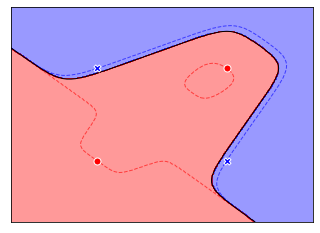

In [39]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import cvxpy as cp

# 可以修改以下 3 个超参
zeta = 1
gamma = 6
d = 11

# 数据集
X = np.array([[-1,-1], [-1,2], [2,2], [2,-1]])
y = np.array([1, -1, 1, -1, ])

# 多项式核
def polynomial_kernel(x1, x2):
	return (zeta+gamma*x1@x2.T)**d

# 凸优化
m = X.shape[0]	# 样本数
# 构造约束条件
lambdas = cp.Variable(m)
constraint_1 = [lambdas[i] >=0 for i in range(m)]
constraint_2 = [lambdas@y.T == 0]
# 构造 K 矩阵
K = np.array([])
for i in range(m):
	for j in  range(m):
		K = np.append(K,y[i]*polynomial_kernel(X[i],X[j])*y[j])
K = K.reshape(m,m)
# 构造优化目标
objective_dual = cp.Minimize(1/2*cp.quad_form(lambdas,K)-cp.sum(lambdas))
# 构造凸优化问题并求解
prob_dual = cp.Problem(objective_dual,constraint_1+constraint_2)
prob_dual.solve()

# 得到支持向量
epsilon = 0.00000000000000000001
lambdas = lambdas.value
support_y = y[lambdas > epsilon]
support_X = X[lambdas > epsilon]
support_lambdas = lambdas[lambdas > epsilon]

# 根据 f(x) 构造 h(x)
def h(x):
	return np.where(f(x) < 0, -1, 1)

# 根据支持向量构造 f(x)
def f(x):
	wx = 0
	b = support_y[0]
	for xk, yk, lambdak, in zip(support_X, support_y, support_lambdas,):
		wx += lambdak*yk*polynomial_kernel(xk, x)
		b -= lambdak*yk*polynomial_kernel(xk, support_X[0])
	return wx+b

# 以下是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 13})
# 设置subfigure
fig, ax = plt.subplots(figsize = (6, 3))
fig.subplots_adjust(left=0.15, right=0.85, top=0.999, bottom=0.001)

xy_min, xy_max = -3, 4
ax.set(xticks=[], yticks=[])
ax.set_xlim(xy_min, xy_max),ax.set_ylim(xy_min, xy_max)

# 绘制数据集
markers = ('X', 'o')
colors = ('blue', 'red')
for cl, m, color in zip(np.unique(y), markers, colors):
	ax.scatter(X[y==cl, 0], X[y==cl, 1], alpha=1, c=color, edgecolors='w', marker = m, zorder=9, s=7**2)

# 绘制决策区域
cm = ListedColormap(('blue', 'red'))
resolution = 0.03
xx1, xx2 = np.meshgrid(np.arange(xy_min, xy_max, resolution), np.arange(xy_min, xy_max, resolution))
xx = np.column_stack((xx1.ravel(), xx2.ravel()))
yy = h(xx).reshape(xx1.shape)
ax.contourf(xx1, xx2, yy, alpha=0.4, cmap=cm)

# 绘制决策边界的宽度
xx1, xx2 = np.meshgrid(np.arange(-6, 6, 0.1), np.arange(-6, 6, 0.1))
xx = np.column_stack((xx1.ravel(), xx2.ravel()))
ax.contour(xx1, xx2, f(xx).reshape(xx1.shape), [-1, 1], colors=('b', 'r'), antialiased=True, linestyles='dashed', linewidths=1, alpha=0.6)
ax.contour(xx1, xx2, f(xx).reshape(xx1.shape), [0], antialiased=True, colors='k', linewidths=1)

plt.show()

# 7.8

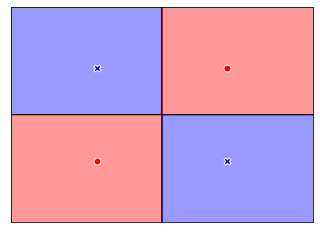

In [40]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import cvxpy as cp

# 可以修改以下这个超参
gamma = 1

# 数据集
X = np.array([[-1,-1], [-1,2], [2,2], [2,-1]])
y = np.array([1, -1, 1, -1, ])

# 高斯核
def gaussian_kernel(x1, x2):
	if x1.shape[0] > 2 or x2.shape[0] > 2:
		return (np.exp(-gamma*np.linalg.norm(x1-x2, axis=1)**2))
	return (np.exp(-gamma*np.linalg.norm(x1-x2)**2))

# 凸优化
m = X.shape[0]	# 样本数
# 构造约束条件
lambdas = cp.Variable(m)
constraint_1 = [lambdas[i] >=0 for i in range(m)]
constraint_2 = [lambdas@y.T == 0]
# 构造 K 矩阵
K = np.array([])
for i in range(m):
	for j in  range(m):
		K = np.append(K,y[i]*gaussian_kernel(X[i],X[j])*y[j])
K = K.reshape(m,m)
# 构造优化目标
objective_dual = cp.Minimize(1/2*cp.quad_form(lambdas,K)-cp.sum(lambdas))
# 构造凸优化问题并求解
prob_dual = cp.Problem(objective_dual,constraint_1+constraint_2)
prob_dual.solve()

# 得到支持向量
epsilon = 0.00000000000000000001
lambdas = lambdas.value
support_y = y[lambdas > epsilon]
support_X = X[lambdas > epsilon]
support_lambdas = lambdas[lambdas > epsilon]

# 根据 f(x) 构造 h(x)
def h(x):
	return np.where(f(x) < 0, -1, 1)

# 根据支持向量构造 f(x)
def f(x):
	wx = 0
	b = support_y[0]
	for xk, yk, lambdak, in zip(support_X, support_y, support_lambdas,):
		wx += lambdak*yk*gaussian_kernel(xk, x)
		b -= lambdak*yk*gaussian_kernel(xk, support_X[0])
	return wx+b

# 以下是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 13})
# 设置subfigure
fig, ax = plt.subplots(figsize = (6, 3))
fig.subplots_adjust(left=0.15, right=0.85, top=0.999, bottom=0.001)

xy_min, xy_max = -3, 4
ax.set(xticks=[], yticks=[])
ax.set_xlim(xy_min, xy_max),ax.set_ylim(xy_min, xy_max)

# 绘制数据集
markers = ('X', 'o')
colors = ('blue', 'red')
for cl, m, color in zip(np.unique(y), markers, colors):
	ax.scatter(X[y==cl, 0], X[y==cl, 1], alpha=1, c=color, edgecolors='w', marker = m, zorder=9, s=7**2)

# 绘制决策区域
cm = ListedColormap(('blue', 'red'))
resolution = 0.03
xx1, xx2 = np.meshgrid(np.arange(xy_min, xy_max, resolution), np.arange(xy_min, xy_max, resolution))
xx = np.column_stack((xx1.ravel(), xx2.ravel()))
yy = h(xx).reshape(xx1.shape)
ax.contourf(xx1, xx2, yy, alpha=0.4, cmap=cm)

# 绘制决策边界的宽度
xx1, xx2 = np.meshgrid(np.arange(-6, 6, 0.1), np.arange(-6, 6, 0.1))
xx = np.column_stack((xx1.ravel(), xx2.ravel()))
ax.contour(xx1, xx2, f(xx).reshape(xx1.shape), [0], antialiased=True, colors='k', linewidths=1)

plt.show()

# 7.10

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_15925/2193066516.py:45: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=1, c=color, edgecolors='k', marker = m, zorder=9)


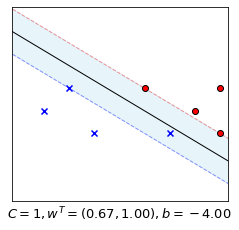

In [4]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

# 超参
C = 1

# 三个点的数据集
X = np.array([[3, 3],[5, 2],[6,3],[6,1],[1, 1],[4,1],[-1,2],[0,3]])
y = np.array([1,1,1,1,-1,-1,-1,-1])

# 凸优化
m = X.shape[0]	# 样本数
n = X.shape[1]	# 样本的特征个数
w = cp.Variable((n,1)) 	# 有多少个特征，就对应几维的 w
b = cp.Variable() 		# 一维向量
xi = cp.Variable((m,1)) # 有多少样本点，就有多少 xi 
objective = cp.Minimize(0.5*cp.norm(w)**2+C*cp.sum(xi)) # 优化的目标，即 min 1/2||w||^2+C Σ xi
constraints = [cp.multiply(y.reshape(-1,1), X@w + b) >= 1 - xi, xi >= 0 ] #约束条件，即 y*(wx+b) >= 1-xi，xi > 0, X 是矩阵所以用 @
prob = cp.Problem(objective, constraints) # 构造凸优化问题
prob.solve() # 解出结果

# 根据优化求出的 w 和 b 构造决策边界
def h(xx):
	return - w.value[0]/w.value[1] * xx  - b.value / w.value[1]

# 设置字体大小
plt.rcParams.update({'font.size': 13})
# 找出数据的边界
x1_min, x1_max = -2, 6
x2_min, x2_max = -1.7, 6.3
# 设置画布和坐标系
fig, ax = plt.subplots(figsize = (6, 3), nrows=1, ncols=1)
fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.1)
ax.set_xticks(()),ax.set_yticks(())
ax.set_xlim(x1_min-0.3, x1_max+0.3),ax.set_ylim(x2_min-0.3, x2_max+0.3)
ax.set_xlabel(r'$C={}, w^T=({:.2f},{:.2f}), b={:.2f}$'.format(C, w.value[0][0], w.value[1][0], b.value))

# 根据类别不同，绘制不同形状的点
markers = ('x', 'o')
colors = ('blue', 'red')
for cl, m, color in zip(np.unique(y), markers, colors):
	ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=1, c=color, edgecolors='k', marker = m, zorder=9)

# 绘制决策边界的宽度
xx1 = np.arange(x1_min-1, x1_max+1, 0.1)
ax.plot(xx1, h(xx1)+1/w.value[1], 'r--', lw=1, alpha=0.4)	# 宽度上界
ax.plot(xx1, h(xx1), 'k', lw=1)								# 决策边界
ax.plot(xx1, h(xx1)-1/w.value[1], 'b--', lw=1, alpha=0.4)	# 宽度下界
ax.fill_between(xx1, h(xx1)-1/w.value[1], h(xx1)+1/w.value[1], color='skyblue', alpha=0.2)

plt.show()

# 7.11

In [5]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

C = 0.2

# 三个点的数据集
X = np.array([[3, 3],[4, 3],[1, 1],])
y = np.array([1,1,-1,])

# 凸优化
m = X.shape[0]	# 样本数
# 构造约束条件
lambdas = cp.Variable(m)
constraint_1 = [lambdas[i] >=0 for i in range(m)]
constraint_2 = [lambdas[i] <=C for i in range(m)]
constraint_3 = [lambdas@y.T == 0]
# 构造优化的目标
yX = y.reshape(-1,1)*X
K = yX@yX.T
objective_dual = cp.Minimize(1/2*cp.quad_form(lambdas,K)-cp.sum(lambdas))
# 构造凸优化问题并求解
prob_dual = cp.Problem(objective_dual,constraint_1+constraint_2+constraint_3)
prob_dual.solve()

# 得到支持向量
lambdas = lambdas.value
support_y = y[lambdas > 0.00001]
support_X = X[lambdas > 0.00001]
support_lambdas = lambdas[lambdas > 0.00001]

print('λ1 ≈ {:.5f}, λ2 ≈ {:.5f}, λ3 ≈ {:.5f}'.format(lambdas[0], lambdas[1], lambdas[2]))

λ1 ≈ 0.20000, λ2 ≈ 0.00000, λ3 ≈ 0.20000
